In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import dtale
import pandas_profiling as pp

In [ ]:
df = pd.read_csv("/Users/youssouf/Documents/PythonCOde/soccer-spi/spi_matches.csv")
df.head()

In [5]:
df.columns

Index(['season', 'date', 'league_id', 'league', 'team1', 'team2', 'spi1',
       'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

In [6]:
df.shape

(45647, 23)

/Users/youssouf/Documents/PythonCOde


In [38]:
df[["season", "date", "league_id", "league", "team1", "team2", "spi1", "spi2", "score1", "score2"]].to_csv("/Users/youssouf/Documents/PythonCOde/soccer.csv",index = False)





KeyError: "None of [Index(['season', 'date', 'league_id', 'league', 'team1', 'team2', 'spi1',\n       'spi2', 'score1', 'score2'],\n      dtype='object')] are in the [columns]"

In [11]:
df["league"].value_counts()

English League Championship                 2228
Major League Soccer                         2003
United Soccer League                        1993
Barclays Premier League                     1900
Spanish Primera Division                    1900
Italy Serie A                               1900
French Ligue 1                              1900
Brasileiro Série A                          1900
Spanish Segunda Division                    1871
Italy Serie B                               1602
English League Two                          1559
German Bundesliga                           1530
French Ligue 2                              1520
English League One                          1519
Turkish Turkcell Super Lig                  1338
Dutch Eredivisie                            1224
German 2. Bundesliga                        1224
Portuguese Liga                             1224
Norwegian Tippeligaen                       1200
Swedish Allsvenskan                         1200
Japanese J League   

In [12]:
df["team1"].value_counts()

Reading                137
Arsenal                124
Real Madrid            122
Manchester City        121
Atletico Madrid        120
                      ... 
Slovan Bratislava        3
Zlín                     3
PFC Oleksandriya         3
Notts County Ladies      3
Sparta Prague            3
Name: team1, Length: 812, dtype: int64

In [15]:
df["league_id"].value_counts()

2412    2228
1951    2003
2160    1993
1854    1900
2411    1900
1869    1900
1843    1900
2105    1900
1871    1871
1856    1602
2414    1559
1845    1530
1844    1520
2413    1519
1882    1338
1864    1224
1849    1224
1846    1224
1859    1200
1874    1200
1947    1139
5641     979
1866     955
2417     876
1952     843
1832     840
1975     825
1820     811
1827     764
1879     720
1837     679
1818     619
4582     570
1983     480
1884     480
7921     469
1948     450
1979     369
9541      44
Name: league_id, dtype: int64

In [19]:
df.dtypes

season           int64
date            object
league_id        int64
league          object
team1           object
team2           object
spi1           float64
spi2           float64
prob1          float64
prob2          float64
probtie        float64
proj_score1    float64
proj_score2    float64
importance1    float64
importance2    float64
score1         float64
score2         float64
xg1            float64
xg2            float64
nsxg1          float64
nsxg2          float64
adj_score1     float64
adj_score2     float64
dtype: object

In [32]:
def plot_hist(dff , col):
    df = dff.groupby([col]).agg({col: ['count']})
    df.columns = ["_".join(x) for x in df.columns.ravel()]
    tmp_col = col + '_count'
    df = df.sort_values(by=[tmp_col], ascending=False)
    df[col] = df.index

    if 0 in list(df.index):
        tmp_list = list(df.index)
        tmp_list.remove(0)
        df = df[df.index.isin(tmp_list)]

    Values = df[col]
    Counts = df[tmp_col]

    # Figure Size
    fig = plt.figure(figsize=(20, 7))

    # Horizontal Bar Plot
    plt.bar(Values, Counts, color='red')

    # Title
    plt.title(col)

    # Rotation of the bars names
    plt.xticks(rotation=40)

    
    # Show Plot
    plt.show()

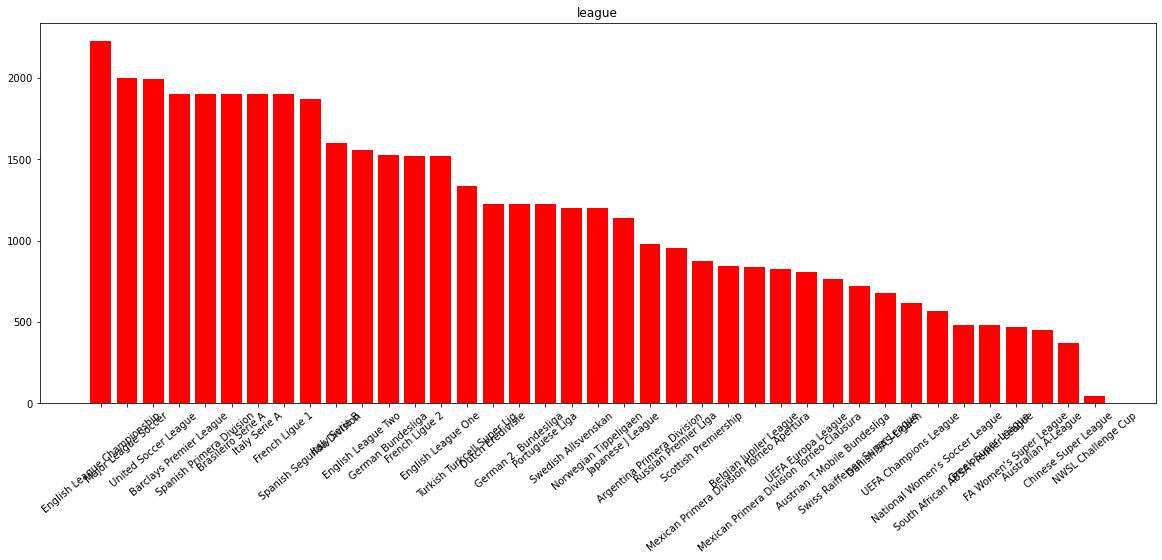

In [33]:
plot_hist(df, "league")

In [35]:
dtale.show(df)

2021-08-04 10:02:44,207 - INFO     - NumExpr defaulting to 8 threads.


Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  Fi

2021-08-04 10:12:44,698 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions

Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  Fi

2021-08-04 10:12:44,752 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/youssouf/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions

In [ ]:
profile = pp.ProfileReport(df)
profile

In [3]:
df1 = pd.read_csv("/Users/youssouf/Documents/Logstash/train.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp","Parch", "Ticket", "Fare", "Cabin", "Embarked"]

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.enableHiveSupport().getOrCreate()

Exception: Java gateway process exited before sending its port number

In [2]:
import pandas as pd

In [6]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [7]:
country_migr = pd.read_csv("/Users/youssouf/Downloads/Case study - Skill migration/Data sets/Country Migration.csv")

In [8]:
country_migr = country_migr.rename(columns={'net_per_10K_2015': '2015', 'net_per_10K_2016': '2016',
                                               'net_per_10K_2017': '2017', 'net_per_10K_2018': '2018',
                                               'net_per_10K_2019': '2019'})

In [12]:
df = country_migr.groupby(['base_country_code', "target_country_code"]).agg({'2017' : ["count", "max"]})

In [14]:
df.columns = ["_".join(x) for x in df.columns.ravel()]

In [15]:
df = df.sort_values(by=['2017_max'], ascending=False)
df.head()

,,2017_count,2017_max
base_country_code,target_country_code,,
lu,fr,1,87.00
ae,in,1,54.55
qa,in,1,33.18
cy,tr,1,29.38
lu,be,1,28.53


In [20]:
np.unique(df["2017_count"].values)

array([1])

In [21]:
import numpy as np
import pandas as pd

In [22]:
model = pd.read_csv("/Users/youssouf/Documents/simboxv2/final_data_MLcooll.csv")
model.head()

,msisdn,dure_call_moy_inter,duree_call_moy_en,duree_call_moy_inter_en,duree_call_moy_sort,duree_call_sort_moy_of,duree_call_sort_moy_on,duree_call_tot_en,duree_call_tot_sort,duree_moy_call_complice,duree_moy_sort_night,ecartyp_temp_appel,ecartyp_temp_sms,mnt_emprunt_tot_sos,mnt_med_data,mnt_med_inter,mnt_med_mix,mnt_med_sva,mnt_rechar_tot,nbr_achat_pass_data,nbr_achat_pass_inter,nbr_achat_pass_mix,nbr_achat_pass_sva,nbr_appel_inter,nbr_call_dist_call,nbr_call_en_abs,nbr_call_inter_tot_en,nbr_call_sort_abs,nbr_call_sort_night,nbr_call_sort_of,nbr_call_sort_on,nbr_call_tot_complice,nbr_call_tot_en,nbr_dist_abs_en,nbr_dist_abs_sort,nbr_dist_call_complice,nbr_dist_call_en,nbr_dist_call_sort_night,nbr_dist_inter_en,nbr_dist_profil,nbr_dist_sms_en,nbr_dist_sort_of,nbr_dist_sort_on,nbr_emprunt_sos,nbr_rechar,nbr_sms_inter,nbr_sms_sort,nbr_sms_sort_of,nbr_sms_sort_on,nbr_tot_call,nbr_tot_rechar_om,nbr_tot_transact_om_receiv,nbr_tot_transact_om_send,nbre_distinct_imei,nbre_imsi,rechar_om_med,rechar_om_tot,temp_appel_moy,temp_sms_moy,transact_om_med_receiv,statut_activite,statut_om,supplier_name,profil,transact_om_med_send,vol_data_conso,statut
0,89784300,0.0,101.0,41.5,139.0,78.5,13.0,799.0,1637.5,45.0,213.0,8253.829842,5240.162961,500.0,200.0,0.0,400.0,52.0,750.0,2.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0,1.0,1.0,7.0,2.0,2.0,6.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,6.0,2.0,1.0,1.0,0.0,1.0,1.0,10.0,7.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,3326.247706,1970.390558,0.0,1.0,0.0,APPLE,DAUPHIN,0.0,200843776.0,0
1,47433438,0.0,76.0,74.5,37.0,92.0,0.0,179.5,37.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,150.0,0.0,200.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0,PROXY,0.0,1024.0,0
2,7222346,0.0,58.5,0.0,37.5,20.0,0.0,117.5,51.5,0.0,0.0,10071.468485,0.000000,0.0,0.0,0.0,0.0,103.0,125.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10136.750000,0.000000,0.0,1.0,0.0,0,AIGLE,0.0,2560.0,0
3,7511525,0.0,110.0,0.0,29.0,11.0,0.0,220.0,66.5,0.0,0.0,8849.915171,0.000000,500.0,175.0,0.0,0.0,5.0,500.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,11549.428571,0.000000,10350.0,1.0,0.0,0,ORANGE_NOVA,4900.0,162554155.5,0
4,68842650,0.0,69.0,62.0,99.0,5.0,40.0,455.0,770.0,219.5,0.0,7050.847750,1088.578852,0.0,100.0,0.0,150.0,52.0,1000.0,1.0,0.0,2.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,6.0,1.0,2.5,7.0,1.0,1.0,1.0,4.0,0.0,1.0,1.0,1.0,5.0,1.0,0.0,1.0,0.0,114.5,114.5,0.0,8.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,4988.915842,391.236244,0.0,1.0,0.0,MORE INTERNATIONAL GROUP LIMITED,DAUPHIN,0.0,973312.0,0


In [25]:
cols_list = ['dure_call_moy_inter', 'duree_call_moy_en',
       'duree_call_moy_inter_en', 'duree_call_moy_sort',
       'duree_call_sort_moy_of', 'duree_call_sort_moy_on', 'duree_call_tot_en',
       'duree_call_tot_sort', 'duree_moy_call_complice',
       'duree_moy_sort_night', 'ecartyp_temp_appel', 'ecartyp_temp_sms',
       'mnt_emprunt_tot_sos', 'mnt_med_data', 'mnt_med_inter', 'mnt_med_mix',
       'mnt_med_sva', 'mnt_rechar_tot', 'nbr_achat_pass_data',
       'nbr_achat_pass_inter', 'nbr_achat_pass_mix', 'nbr_achat_pass_sva',
       'nbr_appel_inter', 'nbr_call_dist_call', 'nbr_call_en_abs',
       'nbr_call_inter_tot_en', 'nbr_call_sort_abs', 'nbr_call_sort_night',
       'nbr_call_sort_of', 'nbr_call_sort_on', 'nbr_call_tot_complice',
       'nbr_call_tot_en', 'nbr_dist_abs_en', 'nbr_dist_abs_sort',
       'nbr_dist_call_complice', 'nbr_dist_call_en',
       'nbr_dist_call_sort_night', 'nbr_dist_inter_en', 'nbr_dist_profil',
       'nbr_dist_sms_en', 'nbr_dist_sort_of', 'nbr_dist_sort_on',
       'nbr_emprunt_sos', 'nbr_rechar', 'nbr_sms_inter', 'nbr_sms_sort',
       'nbr_sms_sort_of', 'nbr_sms_sort_on', 'nbr_tot_call',
       'nbr_tot_rechar_om', 'nbr_tot_transact_om_receiv',
       'nbr_tot_transact_om_send', 'nbre_distinct_imei', 'nbre_imsi',
       'rechar_om_med', 'rechar_om_tot', 'temp_appel_moy', 'temp_sms_moy',
       'transact_om_med_receiv', 'statut_activite', 'statut_om','transact_om_med_send', 'vol_data_conso']

In [29]:
bons = model[model["statut"] == 0.0]
mauvais = bons = model[model["statut"] == 1.0]

In [30]:
bons1 = bons[cols_list]
mauvais1 = mauvais[cols_list]

In [31]:
from sklearn.ensemble import IsolationForest

In [32]:
clf = IsolationForest(random_state=0).fit(bons1)

In [34]:
clf.predict(mauvais1)

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
np.unique(clf.predict(mauvais1), return_counts = True)

(array([-1,  1]), array([  30, 1930]))